In [1]:
from PIL import Image
import random
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Extraindo dados

In [2]:
data = []
classes = []

desc_file = open("./dataset-brazilian_coffee_scenes/desc.txt")
desc = desc_file.read().split("\n")
desc_file.close()

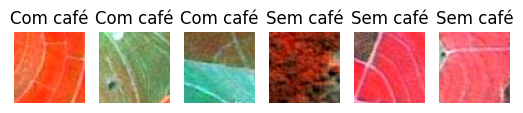

In [3]:
coffee_desc = []
noncoffee_desc = []
for image in desc:
    if "noncoffee." in image:
        noncoffee_desc.append(image)
    else:
        coffee_desc.append(image)

coffee_samples = list(random.sample(coffee_desc, 3))
noncoffee_samples = list(random.sample(noncoffee_desc, 3))
fig, axs = plt.subplots(1, 6)
for ax, sample in zip(axs, coffee_samples + noncoffee_samples):
    if "noncoffee" in sample:
        img_path = "./dataset-brazilian_coffee_scenes/images/" + sample.replace("noncoffee.", "") + ".jpg"
        title = "Sem café"
    else:
        img_path = "./dataset-brazilian_coffee_scenes/images/" + sample.replace("coffee.", "") + ".jpg"
        title = "Com café"

    ax.imshow(mpimg.imread(img_path))
    ax.set_title(title)
    ax.axis('off')

plt.show()

In [4]:
for image in desc:
    if "noncoffee" in image:
        classes.append(0)
        im = Image.open("./dataset-brazilian_coffee_scenes/images/" + image.replace("noncoffee.", "") + ".jpg")
    elif "coffee" in image:
        classes.append(1)
        im = Image.open("./dataset-brazilian_coffee_scenes/images/" + image.replace("coffee.", "") + ".jpg")

    green = []
    red = []
    nir = []
    ndvi = []
    for pixel_data in list(im.getdata()):
        green.append(pixel_data[0])
        red.append(pixel_data[1])
        nir.append(pixel_data[2])
        try:
            ndvi.append(((pixel_data[2]-pixel_data[1])/(pixel_data[2]+pixel_data[1])) + 1)
        except:
            ndvi.append(0)

    data.append([mean(green), mean(red), mean(nir), mean(ndvi)])

In [5]:
print(classes.count(0))
print(classes.count(1))
print(len(data))
print(len(data[0]))

1438
1438
2876
4


## Comparação kNN

### Distância Euclidiana

k = 1, k = 3, k = 5, k = 7, k = 9, k = 11, k = 13, k = 15, k = 17, k = 19, 

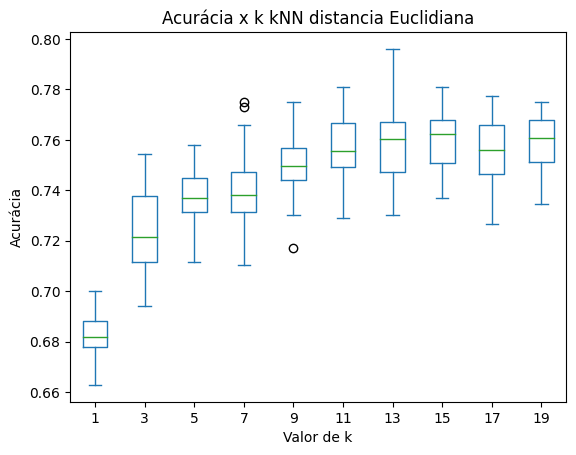

In [6]:
accuracies_knn_euclidean = {}
ks = list(range(1, 20, 2))
for k in ks:
    k_accuracies = []
    for i in range(0, 30):
        x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean').fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        k_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    accuracies_knn_euclidean.update({k: k_accuracies})
    print(f"k = {k}, ", end='')

accuracies_df = pd.DataFrame(accuracies_knn_euclidean)
accuracies_df[ks].plot(kind='box', title='boxplot')
plt.title("Acurácia x k kNN distancia Euclidiana")
plt.ylabel('Acurácia')
plt.xlabel('Valor de k')
plt.show()

### Distância Manhattan

k = 1, k = 3, k = 5, k = 7, k = 9, k = 11, k = 13, k = 15, k = 17, k = 19, 

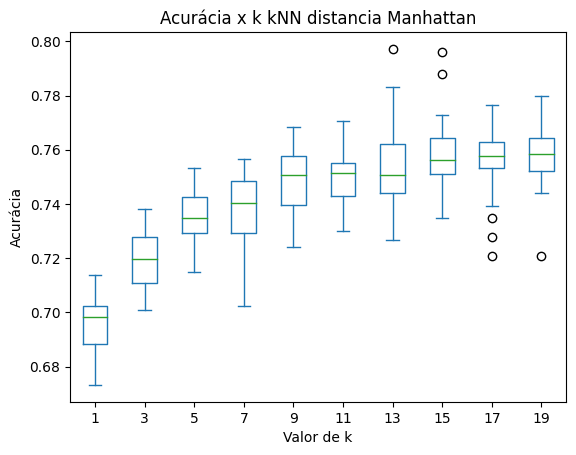

In [7]:
accuracies_knn_manhattan = {}
ks = list(range(1, 20, 2))
for k in ks:
    k_accuracies = []
    for i in range(0, 30):
        x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan').fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        k_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    accuracies_knn_manhattan.update({k: k_accuracies})
    print(f"k = {k}, ", end='')

accuracies_df = pd.DataFrame(accuracies_knn_manhattan)
accuracies_df[ks].plot(kind='box', title='boxplot')
plt.title("Acurácia x k kNN distancia Manhattan")
plt.ylabel('Acurácia')
plt.xlabel('Valor de k')
plt.show()

## Comparação DWNN

k = 1, k = 3, k = 5, k = 7, k = 9, k = 11, k = 13, k = 15, k = 17, k = 19, 

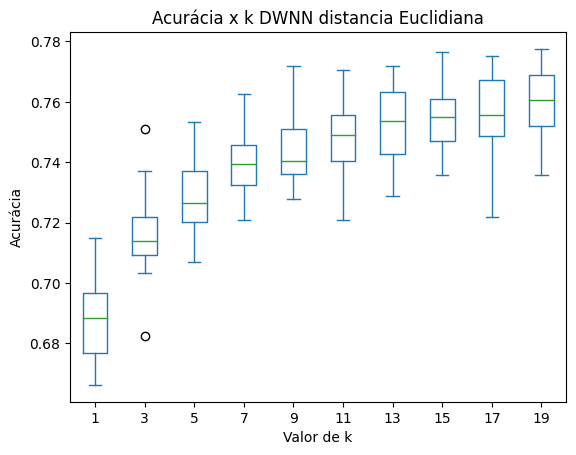

In [8]:
accuracies_dwnn_euclidean = {}
ks = list(range(1, 20, 2))
for k in ks:
    k_accuracies = []
    for i in range(0, 30):
        x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors = k, weights = "distance", metric = 'euclidean').fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        k_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    accuracies_dwnn_euclidean.update({k: k_accuracies})
    print(f"k = {k}, ", end='')

accuracies_df = pd.DataFrame(accuracies_dwnn_euclidean)
accuracies_df[ks].plot(kind='box', title='boxplot')
plt.title("Acurácia x k DWNN distancia Euclidiana")
plt.ylabel('Acurácia')
plt.xlabel('Valor de k')
plt.show()

k = 1, k = 3, k = 5, k = 7, k = 9, k = 11, k = 13, k = 15, k = 17, k = 19, 

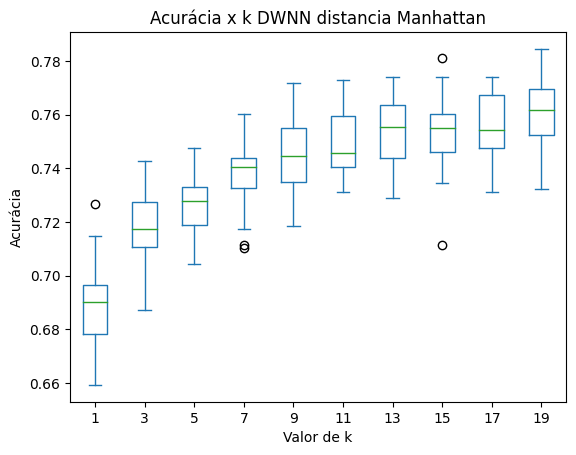

In [9]:
accuracies_dwnn_manhattan = {}
ks = list(range(1, 20, 2))
for k in ks:
    k_accuracies = []
    for i in range(0, 30):
        x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors = k, weights = "distance", metric = 'manhattan').fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        k_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    accuracies_dwnn_manhattan.update({k: k_accuracies})
    print(f"k = {k}, ", end='')

accuracies_df = pd.DataFrame(accuracies_dwnn_manhattan)
accuracies_df[ks].plot(kind='box', title='boxplot')
plt.title("Acurácia x k DWNN distancia Manhattan")
plt.ylabel('Acurácia')
plt.xlabel('Valor de k')
plt.show()

## Comparação Naive Bayes

Gaussian, Multinomial, Complement, 

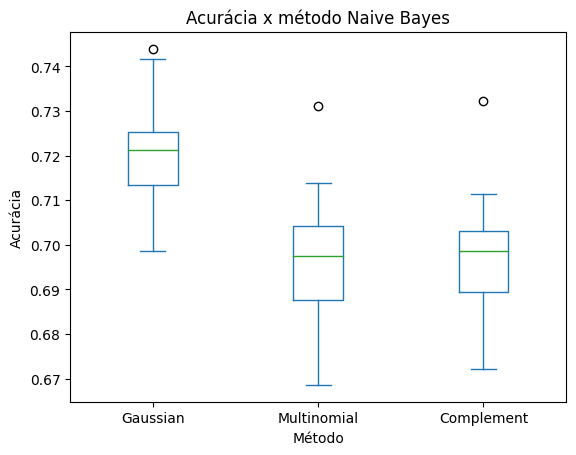

In [10]:
accuracies_bayes = {}
#methods = ["Gaussian", "Multinomial", "Complement", "Bernoulli", "Categorical"]
methods = ["Gaussian", "Multinomial", "Complement"]
for method in methods:
    method_accuracies = []
    for i in range(0, 30):
        x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, shuffle = True)
        bayes = eval(method + "NB()").fit(x_train, y_train)
        y_pred = bayes.predict(x_test)
        method_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    accuracies_bayes.update({method: method_accuracies})
    print(f"{method}, ", end='')

accuracies_df = pd.DataFrame(accuracies_bayes)
accuracies_df[methods].plot(kind='box', title='boxplot')
plt.title("Acurácia x método Naive Bayes")
plt.ylabel('Acurácia')
plt.xlabel('Método')
plt.show()

## Comparação Decision Trees

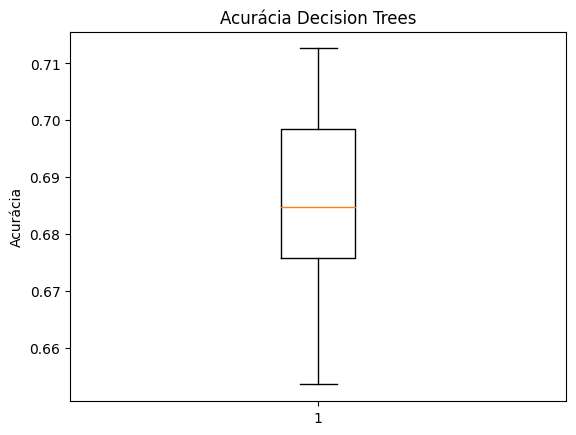

In [11]:
accuracies_dt = []
for i in range(0, 30):
    x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, shuffle = True)
    decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
    y_pred = decision_tree.predict(x_test)
    accuracies_dt.append(metrics.accuracy_score(y_test, y_pred))

plt.boxplot(accuracies_dt)
plt.title("Acurácia Decision Trees")
plt.ylabel('Acurácia')
plt.show()

## Comparação Random Forest

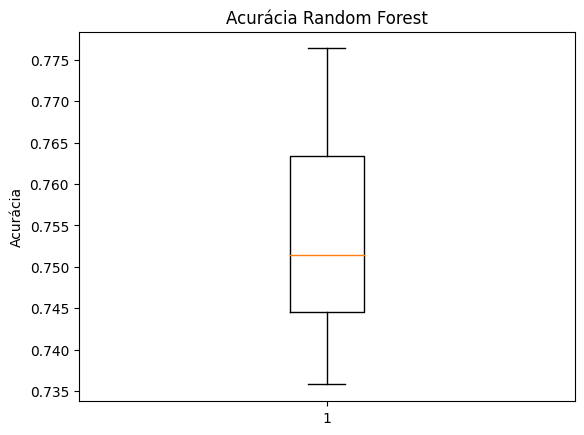

In [12]:
accuracies_rf = []
for i in range(0, 30):
    x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size = 0.3, shuffle = True)
    random_forest = RandomForestClassifier().fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    accuracies_rf.append(metrics.accuracy_score(y_test, y_pred))

plt.boxplot(accuracies_rf)
plt.title("Acurácia Random Forest")
plt.ylabel('Acurácia')
plt.show()